In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import mnist

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [3]:
print('Training data shapes: X=%s, Y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, Y=%s' % (testX.shape, testY.shape))

Training data shapes: X=(60000, 28, 28), Y=(60000,)
Testing data shapes: X=(10000, 28, 28), Y=(10000,)


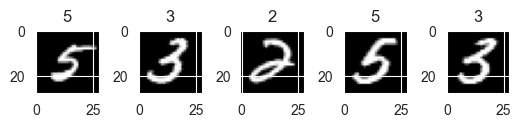

In [4]:
for j in range(5):
    i = np.random.randint(0,1000)
    plt.subplot(550 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainY[i])
plt.show()

In [5]:
# Normalizasyon ve boyut azaltma

trainX = trainX / 255
testX = testX / 255
train_data = np.reshape(trainX, (60000, 28*28))
test_data = np.reshape(testX, (10000,28*28))
print( train_data.shape, test_data.shape )

(60000, 784) (10000, 784)


In [6]:
import tensorflow
input_data = tensorflow.keras.layers.Input(shape=(784))
encoder = tensorflow.keras.layers.Dense(100)(input_data)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoder = tensorflow.keras.layers.Dense(50)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoder = tensorflow.keras.layers.Dense(25)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoded = tensorflow.keras.layers.Dense(2)(encoder)

In [7]:
decoder = tensorflow.keras.layers.Dense(25)(encoded)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoder = tensorflow.keras.layers.Dense(50)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoder = tensorflow.keras.layers.Dense(100)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoded = tensorflow.keras.layers.Dense(784)(decoder)

In [8]:
autoencoder = tensorflow.keras.models.Model(inputs= input_data, outputs= decoded)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 activation_2 (Activation)   (None, 25)                0    

In [9]:
autoencoder.fit(train_data, train_data, epochs=10, batch_size=64, validation_data=(test_data, test_data))

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.0540 - val_loss: 0.0484
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0469 - val_loss: 0.0455
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0447 - val_loss: 0.0437
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0435 - val_loss: 0.0430
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0427 - val_loss: 0.0421
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0415 - val_loss: 0.0409
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0408 - val_loss: 0.0407
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0405 - val_loss: 0.0404
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0400 - val_loss: 0.0398
Epoch 10/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0396 - val_loss: 0.0391

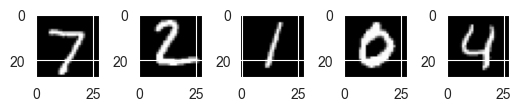

1/1 [==============================] - 0s 22ms/step


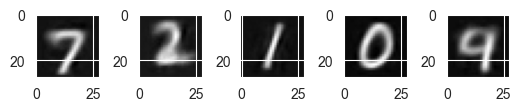

In [11]:
# Gerçek resimler
for i in range(5):
    plt.subplot(550 + 1 + i)
    plt.imshow(testX[i], cmap='gray')
plt.show()

#yeniden oluşturulmuş resimler

for i in range(5):
    plt.subplot(550 + 1 + i)
    output = autoencoder.predict(np.array([test_data[i]]))
    op_image = np.reshape(output[0]*255, (28,28))
    plt.imshow(op_image, cmap='gray')
plt.show()